###Importing the libraries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

###Loading the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

###Displaying a few images

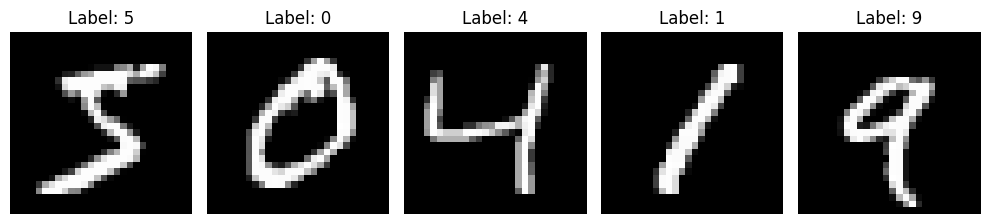

In [ ]:
num_images_to_display = 5

plt.figure(figsize=(10, 3))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

###Preprocessing the dataset

In [ ]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

###Implementing the Base CNN architecture

In [ ]:
def build_base_cnn():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for MNIST digits

    return model

base_model = build_base_cnn()
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

###Training the Base CNN

In [ ]:
base_history = base_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 39s 41ms/step - loss: 0.1476 - accuracy: 0.9560 - val_loss: 0.0495 - val_accuracy: 0.9844
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0325 - val_accuracy: 0.9893
Epoch 3/10
938/938 [==============================] - 39s 41ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0288 - val_accuracy: 0.9904
Epoch 4/10
938/938 [==============================] - 38s 41ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0398 - val_accuracy: 0.9875
Epoch 5/10
938/938 [==============================] - 39s 42ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0274 - val_accuracy: 0.9915
Epoch 6/10
938/938 [==============================] - 38s 41ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0398 - val_accuracy: 0.9889
Epoch 7/10
938/938 [==============================] - 39s 41ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0332 - val_accuracy:

###Activation functions

In [ ]:
activation_functions = ['relu', 'tanh', 'sigmoid']

activation_models = []
activation_histories = []

for activation in activation_functions:
    model = build_base_cnn()
    for layer in model.layers:
        if isinstance(layer, layers.Conv2D):
            layer.activation = tf.keras.activations.get(activation)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    activation_models.append(model)

for model in activation_models:
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
    activation_histories.append(history)


Epoch 1/10
938/938 [==============================] - 39s 41ms/step - loss: 0.1531 - accuracy: 0.9518 - val_loss: 0.0359 - val_accuracy: 0.9881
Epoch 2/10
938/938 [==============================] - 39s 41ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0425 - val_accuracy: 0.9867
Epoch 3/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0404 - val_accuracy: 0.9860
Epoch 4/10
938/938 [==============================] - 38s 41ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0358 - val_accuracy: 0.9891
Epoch 5/10
938/938 [==============================] - 38s 41ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0284 - val_accuracy: 0.9906
Epoch 6/10
938/938 [==============================] - 38s 41ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 7/10
938/938 [==============================] - 39s 41ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0292 - val_accuracy:

###Convolutional Layer configurations

In [ ]:
configs = [
    [(32, (3, 3)), (64, (3, 3)), (128, (3, 3))],
    [(64, (3, 3)), (128, (3, 3)), (256, (3, 3))]
]

config_models = []
config_histories = []

for config in configs:
    model = models.Sequential()
    for filters, kernel_size in config:
        model.add(layers.Conv2D(filters, kernel_size, activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    config_models.append(model)

for model in config_models:
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
    config_histories.append(history)


Epoch 1/10
938/938 [==============================] - 71s 75ms/step - loss: 0.1456 - accuracy: 0.9562 - val_loss: 0.0465 - val_accuracy: 0.9849
Epoch 2/10
938/938 [==============================] - 69s 74ms/step - loss: 0.0405 - accuracy: 0.9881 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 3/10
938/938 [==============================] - 68s 73ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0322 - val_accuracy: 0.9897
Epoch 4/10
938/938 [==============================] - 68s 72ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0283 - val_accuracy: 0.9906
Epoch 5/10
938/938 [==============================] - 70s 75ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 6/10
938/938 [==============================] - 68s 73ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0315 - val_accuracy: 0.9899
Epoch 7/10
938/938 [==============================] - 68s 73ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0252 - val_accuracy:

###Evaluation and Analysis

In [ ]:
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
    return loss, accuracy, report

def plot_comparison(histories, labels, metric):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history[metric], label=label)
    plt.title(f'{metric} Comparison')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

base_loss, base_accuracy, base_report = evaluate_model(base_model, x_test, y_test)
print("Base Model:")
print("Loss:", base_loss)
print("Accuracy:", base_accuracy)
print(base_report)




313/313 [==============================] - 2s 6ms/step
Base Model:
Loss: 0.04757086932659149
Accuracy: 0.9890000224113464
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.97      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 [==============================] - 9s 29ms/step


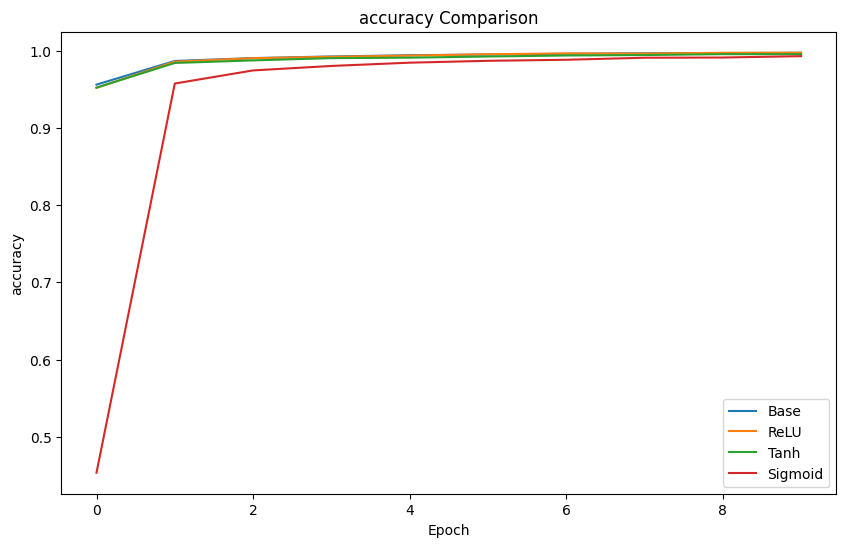

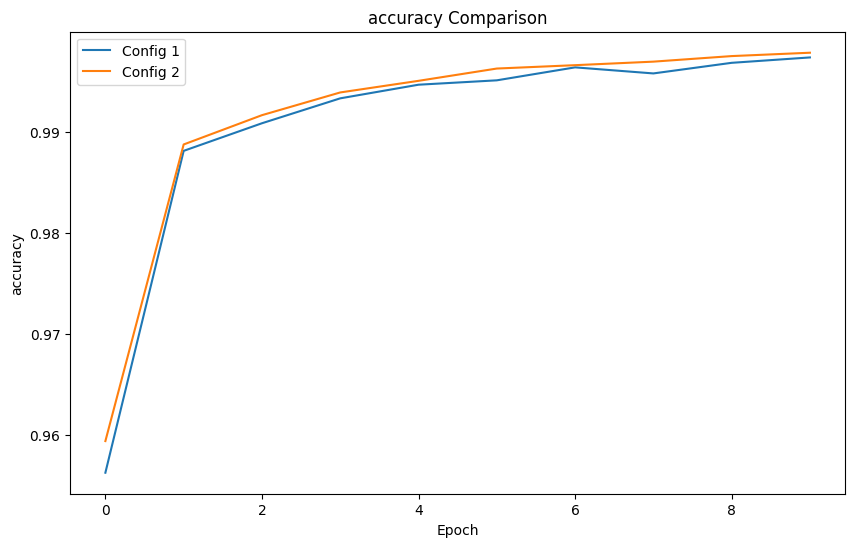

In [ ]:
activation_labels = ['ReLU', 'Tanh', 'Sigmoid']
activation_losses = []
activation_accuracies = []
activation_reports = []

for model in activation_models:
    loss, accuracy, report = evaluate_model(model, x_test, y_test)
    activation_losses.append(loss)
    activation_accuracies.append(accuracy)
    activation_reports.append(report)

config_labels = ['Config 1', 'Config 2']
config_losses = []
config_accuracies = []
config_reports = []

for model in config_models:
    loss, accuracy, report = evaluate_model(model, x_test, y_test)
    config_losses.append(loss)
    config_accuracies.append(accuracy)
    config_reports.append(report)

plot_comparison([base_history] + activation_histories, ['Base'] + activation_labels, 'accuracy')
plot_comparison(config_histories, config_labels, 'accuracy')